In [1]:


import pandas as pd
import numpy as np 
from  sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('dataset.csv')

In [4]:
data.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,M3,userId,productId,Rating
0,0.0001,0.0001,0.000100,0.000100,10.533904,0.020000,0.0001,0.0010,0.000100,0.000055,0.020028,0.004033,0.000120,0.020175,STOP,A2CX7LUOHB2NDG,321732944,5
1,0.0001,0.0001,0.649088,10.533804,10.533904,0.200000,0.0001,0.0001,0.000009,3.686851,2.043426,2.252111,2.755849,6.642700,RAISE,A2NWSAGRHCP8N5,439886341,1
2,0.0201,0.0011,1.034308,9.884816,10.533904,0.012324,0.4001,0.3001,0.061619,3.463706,1.744177,2.080688,3.011271,6.487301,RAISE,A2WNBOD3WNDNKT,439886341,3
3,0.0401,0.0021,1.751681,9.499596,10.533904,0.020927,0.8001,0.6001,0.098188,3.332879,1.687366,2.003913,3.651600,7.005406,RAISE,A1GI0U4ZRJA8WN,439886341,1
4,0.0391,0.0031,1.967625,8.782223,10.533904,0.036879,1.2001,0.9001,0.166290,3.081598,1.577678,1.856335,3.724070,6.842547,RAISE,A1QGNMC6O1VW39,511189877,5


In [5]:
data_clust=data.iloc[0:897,0:15]

data_recom=data.iloc[:,15:]

In [7]:
data_recom.head()

,userId,productId,Rating
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1
2,A2WNBOD3WNDNKT,439886341,3
3,A1GI0U4ZRJA8WN,439886341,1
4,A1QGNMC6O1VW39,511189877,5


In [8]:
data_clust.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,M3
0,0.0001,0.0001,0.000100,0.000100,10.533904,0.020000,0.0001,0.0010,0.000100,0.000055,0.020028,0.004033,0.000120,0.020175,STOP
1,0.0001,0.0001,0.649088,10.533804,10.533904,0.200000,0.0001,0.0001,0.000009,3.686851,2.043426,2.252111,2.755849,6.642700,RAISE
2,0.0201,0.0011,1.034308,9.884816,10.533904,0.012324,0.4001,0.3001,0.061619,3.463706,1.744177,2.080688,3.011271,6.487301,RAISE
3,0.0401,0.0021,1.751681,9.499596,10.533904,0.020927,0.8001,0.6001,0.098188,3.332879,1.687366,2.003913,3.651600,7.005406,RAISE
4,0.0391,0.0031,1.967625,8.782223,10.533904,0.036879,1.2001,0.9001,0.166290,3.081598,1.577678,1.856335,3.724070,6.842547,RAISE


In [11]:
data_clust.isnull().sum()

N1     0
N2     0
N3     0
N4     0
N5     0
N6     0
N7     0
N8     0
N9     0
N10    0
N11    0
N12    0
N13    0
N14    0
M3     0
dtype: int64

In [13]:
out=data_clust['M3']
input=data_clust.drop('M3',axis=1)

In [14]:
#for clustering scaling is must 
scaler=StandardScaler()
data_sc=scaler.fit_transform(input)
data_sc=pd.DataFrame(data_sc,columns=input.columns)

In [15]:
data_sc

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
0,-2.473613,-1.318140,-2.525802,-1.432362,0.0,-0.099540,-1.219368,-1.219272,-2.513870,-1.454856,-0.219083,-0.763659,-3.274864,-1.569459
1,-2.473613,-1.318140,-2.281730,2.524661,0.0,-0.068158,-1.219368,-1.219369,-2.514227,2.503527,0.135991,1.087882,-2.068152,-0.464287
2,-1.990776,-1.290001,-2.136856,2.280867,0.0,-0.100878,-1.187224,-1.187225,-2.271015,2.263944,0.083478,0.946697,-1.956305,-0.490220
3,-1.507938,-1.261861,-1.867065,2.136157,0.0,-0.099378,-1.155081,-1.155082,-2.126651,2.123479,0.073509,0.883464,-1.675910,-0.403758
4,-1.532080,-1.233721,-1.785853,1.866674,0.0,-0.096597,-1.122937,-1.122938,-1.857812,1.853688,0.054260,0.761917,-1.644176,-0.430936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,2.692747,2.818388,1.272528,-1.031933,0.0,0.095566,2.766412,2.766417,1.033867,-1.008337,0.013785,-0.373809,1.241092,0.407727
893,2.692747,2.846528,1.634627,-1.269348,0.0,0.227329,2.798555,2.798561,1.270715,-1.245833,0.126999,-0.358630,1.607354,0.636516
894,2.692747,2.874667,-0.789684,-1.631036,0.0,0.785699,2.830699,2.830704,1.631538,-1.607645,0.659442,0.002387,-1.299725,0.006848
895,2.692747,-1.318140,-0.470791,0.790518,0.0,-0.407452,2.862842,2.862847,-0.784228,0.814741,-0.343527,-0.009965,-0.363870,-0.402038


In [16]:
data_sc.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
0,-2.473613,-1.318140,-2.525802,-1.432362,0.0,-0.099540,-1.219368,-1.219272,-2.513870,-1.454856,-0.219083,-0.763659,-3.274864,-1.569459
1,-2.473613,-1.318140,-2.281730,2.524661,0.0,-0.068158,-1.219368,-1.219369,-2.514227,2.503527,0.135991,1.087882,-2.068152,-0.464287
2,-1.990776,-1.290001,-2.136856,2.280867,0.0,-0.100878,-1.187224,-1.187225,-2.271015,2.263944,0.083478,0.946697,-1.956305,-0.490220
3,-1.507938,-1.261861,-1.867065,2.136157,0.0,-0.099378,-1.155081,-1.155082,-2.126651,2.123479,0.073509,0.883464,-1.675910,-0.403758
4,-1.532080,-1.233721,-1.785853,1.866674,0.0,-0.096597,-1.122937,-1.122938,-1.857812,1.853688,0.054260,0.761917,-1.644176,-0.430936


In [17]:
input.describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
count,897.000000,897.000000,897.000000,897.000000,8.970000e+02,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.102562,0.046943,6.716206,3.813087,1.053390e+01,0.590930,15.174203,11.380670,0.636903,1.355093,1.268476,0.931242,7.478824,9.424846
std,0.041445,0.035557,2.660483,2.663513,1.084182e-13,5.738883,12.451183,9.338373,0.253457,0.931909,5.701704,1.214843,2.284943,5.995644
min,-0.000900,0.000100,0.000100,-0.807817,1.053390e+01,-130.236576,0.000100,0.000100,0.000009,-0.262316,-129.986635,-25.747386,0.000120,-119.725790
25%,0.075100,0.016100,4.794128,1.523688,1.053390e+01,0.165759,4.800100,3.600100,0.455020,0.553417,1.016933,0.568474,5.953814,8.326474
50%,0.102100,0.039100,7.110902,3.411969,1.053390e+01,0.398919,12.000100,9.000100,0.675049,1.214296,1.168410,0.838998,7.857244,9.666531
75%,0.132100,0.072100,9.008911,5.739776,1.053390e+01,1.013910,22.800100,17.100100,0.855230,2.024717,1.529315,1.292233,9.395223,10.964555
max,0.218100,0.149100,11.341721,10.533804,1.053390e+01,33.864220,51.200100,38.400100,1.076687,3.686851,34.116849,7.075999,11.376482,44.173466


<Axes: xlabel='M3'>

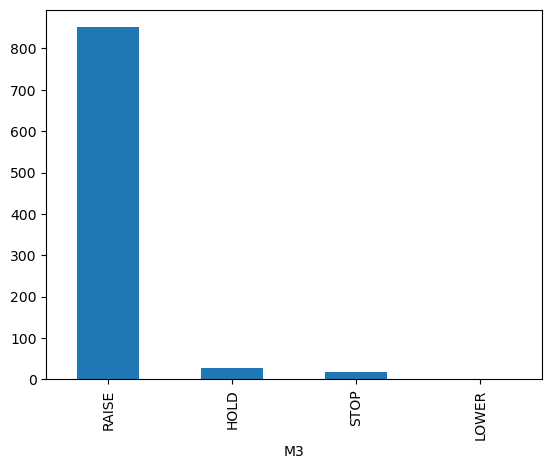

In [19]:
out.value_counts().plot(kind='bar')

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: >

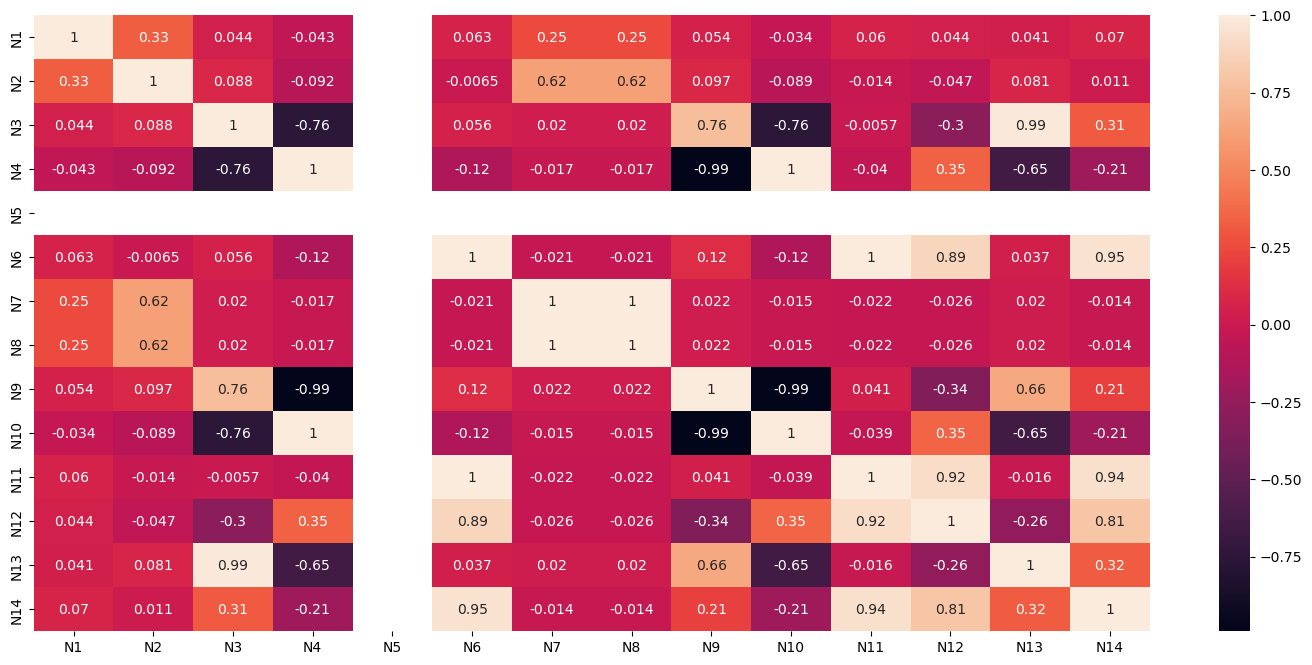

In [22]:
plt.figure(figsize=(18,8))
sns.heatmap(input.corr(),annot=True)

In [23]:
input

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
0,0.0001,0.0001,0.000100,0.000100,10.533904,0.020000,0.0001,0.0010,0.000100,0.000055,0.020028,0.004033,0.000120,0.020175
1,0.0001,0.0001,0.649088,10.533804,10.533904,0.200000,0.0001,0.0001,0.000009,3.686851,2.043426,2.252111,2.755849,6.642700
2,0.0201,0.0011,1.034308,9.884816,10.533904,0.012324,0.4001,0.3001,0.061619,3.463706,1.744177,2.080688,3.011271,6.487301
3,0.0401,0.0021,1.751681,9.499596,10.533904,0.020927,0.8001,0.6001,0.098188,3.332879,1.687366,2.003913,3.651600,7.005406
4,0.0391,0.0031,1.967625,8.782223,10.533904,0.036879,1.2001,0.9001,0.166290,3.081598,1.577678,1.856335,3.724070,6.842547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,0.2141,0.1471,10.099857,1.066052,10.533904,1.139064,49.6001,37.2001,0.898798,0.415938,1.347033,0.477376,10.313067,11.868069
893,0.2141,0.1481,11.062679,0.434047,10.533904,1.894815,50.0001,37.5001,0.958795,0.194737,1.992183,0.495805,11.149489,13.239040
894,0.2141,0.1491,4.616437,-0.528775,10.533904,5.097452,50.4001,37.8001,1.050197,-0.142251,5.026326,0.934140,4.510682,9.465882
895,0.2141,0.0001,5.464372,5.917467,10.533904,-1.746087,50.8001,38.1001,0.438246,2.113933,-0.689121,0.919143,6.647865,7.015712


In [35]:


for i in input.columns:
    sns.boxplot(data_clust[i],data_clust['M3'])
    plt.show()



TypeError: boxenplot() takes from 0 to 1 positional arguments but 2 were given

11661.000000000004
8755.920186339425
6209.027839799276
5023.080205344632
4481.727308859515
3984.0563170214973
3571.370995915622
3345.8398588032037
3135.0697628383764


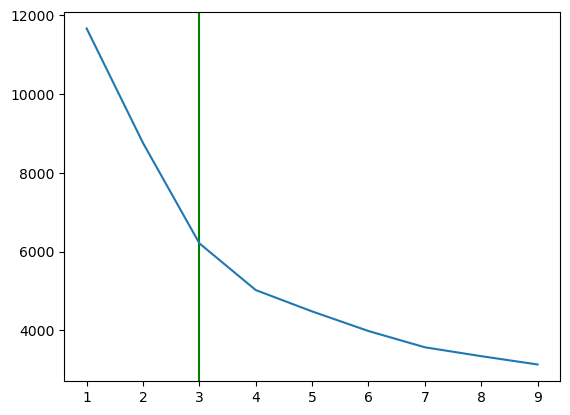

In [41]:
wcss=[]
for i in range(1,10):
    mod=KMeans(n_clusters=i,random_state=10)
    mod.fit(data_sc)
    print(mod.inertia_)
    wcss.append(mod.inertia_)
plt.axvline(3,c='g')
plt.plot(range(1,10),wcss)

In [45]:
sil=[]
for i in range(2,10):
    mod=KMeans(n_clusters=i,random_state=10)
    mod.fit(data_sc)
    sil.append(silhouette_score(data_sc,mod.labels_))
res=pd.DataFrame({"k":range(2,10),"sillhote":sil})
res

,k,sillhote
0,2,0.313135
1,3,0.317937
2,4,0.303720
3,5,0.237326
4,6,0.256253
5,7,0.258981
6,8,0.257923
7,9,0.240234


In [47]:
mod=KMeans(n_clusters=3,random_state=10)
mod.fit(data_sc)

KMeans(n_clusters=3, random_state=10)

In [48]:
mod.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [49]:
extra=pd.DataFrame(mod.labels_)

In [50]:
data_sc['cluster']=extra

In [51]:
data_sc

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,cluster
0,-2.473613,-1.318140,-2.525802,-1.432362,0.0,-0.099540,-1.219368,-1.219272,-2.513870,-1.454856,-0.219083,-0.763659,-3.274864,-1.569459,0
1,-2.473613,-1.318140,-2.281730,2.524661,0.0,-0.068158,-1.219368,-1.219369,-2.514227,2.503527,0.135991,1.087882,-2.068152,-0.464287,0
2,-1.990776,-1.290001,-2.136856,2.280867,0.0,-0.100878,-1.187224,-1.187225,-2.271015,2.263944,0.083478,0.946697,-1.956305,-0.490220,0
3,-1.507938,-1.261861,-1.867065,2.136157,0.0,-0.099378,-1.155081,-1.155082,-2.126651,2.123479,0.073509,0.883464,-1.675910,-0.403758,0
4,-1.532080,-1.233721,-1.785853,1.866674,0.0,-0.096597,-1.122937,-1.122938,-1.857812,1.853688,0.054260,0.761917,-1.644176,-0.430936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,2.692747,2.818388,1.272528,-1.031933,0.0,0.095566,2.766412,2.766417,1.033867,-1.008337,0.013785,-0.373809,1.241092,0.407727,1
893,2.692747,2.846528,1.634627,-1.269348,0.0,0.227329,2.798555,2.798561,1.270715,-1.245833,0.126999,-0.358630,1.607354,0.636516,1
894,2.692747,2.874667,-0.789684,-1.631036,0.0,0.785699,2.830699,2.830704,1.631538,-1.607645,0.659442,0.002387,-1.299725,0.006848,1
895,2.692747,-1.318140,-0.470791,0.790518,0.0,-0.407452,2.862842,2.862847,-0.784228,0.814741,-0.343527,-0.009965,-0.363870,-0.402038,0


In [52]:
cent=mod.cluster_centers_

In [53]:
cent

array([[ -0.03135758,  -0.11949288,  -0.94310698,   1.09476741,
          0.        ,  -0.06784607,  -0.06056318,  -0.06056333,
         -1.09963969,   1.09486494,   0.02118604,   0.43982357,
         -0.84288082,  -0.21598691],
       [  0.02093241,   0.0679999 ,   0.55686518,  -0.6471413 ,
          0.        ,   0.10515922,   0.03542113,   0.03542121,
          0.64999512,  -0.64717764,   0.0529563 ,  -0.1985171 ,
          0.49751634,   0.18966806],
       [ -0.68711468,   0.69384469,  -0.20179   ,   0.43888539,
          0.        , -18.33987278,   0.08243954,   0.08244045,
         -0.43343602,   0.43292468, -18.42408225, -17.12814886,
         -0.13263502, -17.53773264]])

In [54]:
scaler.inverse_transform(cent)

array([[ 1.01262651e-01,  4.26963855e-02,  4.20848553e+00,
         6.72738750e+00,  1.05339040e+01,  2.01786520e-01,
         1.44205398e+01,  1.08154220e+01,  3.58346854e-01,
         2.37483816e+00,  1.38920560e+00,  1.46526020e+00,
         5.55396303e+00,  8.13058771e+00],
       [ 1.03428597e-01,  4.93593250e-02,  8.19691046e+00,
         2.09037863e+00,  1.05339040e+01,  1.19409009e+00,
         1.56149917e+01,  1.17112616e+01,  8.01557084e-01,
         7.52318240e-01,  1.57024921e+00,  6.90208961e-01,
         8.61498619e+00,  1.05613945e+01],
       [ 7.41000000e-02,  7.16000000e-02,  6.17964687e+00,
         4.98141154e+00,  1.05339040e+01, -1.04600774e+02,
         1.62001000e+01,  1.21501000e+01,  5.27106804e-01,
         1.75831404e+00, -1.03721617e+02, -1.98651664e+01,
         7.17592918e+00, -9.56665306e+01]])

In [55]:
data_sc.drop('cluster',inplace=True,axis=1)

In [56]:
cent1=pd.DataFrame(scaler.inverse_transform(cent),columns=data_sc.columns,index=['Group1','Group2',"Group3"])

In [57]:
cent1

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
Group1,0.101263,0.042696,4.208486,6.727388,10.533904,0.201787,14.420540,10.815422,0.358347,2.374838,1.389206,1.465260,5.553963,8.130588
Group2,0.103429,0.049359,8.196910,2.090379,10.533904,1.194090,15.614992,11.711262,0.801557,0.752318,1.570249,0.690209,8.614986,10.561395
Group3,0.074100,0.071600,6.179647,4.981412,10.533904,-104.600774,16.200100,12.150100,0.527107,1.758314,-103.721617,-19.865166,7.175929,-95.666531


In [58]:
data_clust['label']=mod.labels_

In [59]:
data_clust

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,M3,label
0,0.0001,0.0001,0.000100,0.000100,10.533904,0.020000,0.0001,0.0010,0.000100,0.000055,0.020028,0.004033,0.000120,0.020175,STOP,0
1,0.0001,0.0001,0.649088,10.533804,10.533904,0.200000,0.0001,0.0001,0.000009,3.686851,2.043426,2.252111,2.755849,6.642700,RAISE,0
2,0.0201,0.0011,1.034308,9.884816,10.533904,0.012324,0.4001,0.3001,0.061619,3.463706,1.744177,2.080688,3.011271,6.487301,RAISE,0
3,0.0401,0.0021,1.751681,9.499596,10.533904,0.020927,0.8001,0.6001,0.098188,3.332879,1.687366,2.003913,3.651600,7.005406,RAISE,0
4,0.0391,0.0031,1.967625,8.782223,10.533904,0.036879,1.2001,0.9001,0.166290,3.081598,1.577678,1.856335,3.724070,6.842547,RAISE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,0.2141,0.1471,10.099857,1.066052,10.533904,1.139064,49.6001,37.2001,0.898798,0.415938,1.347033,0.477376,10.313067,11.868069,RAISE,1
893,0.2141,0.1481,11.062679,0.434047,10.533904,1.894815,50.0001,37.5001,0.958795,0.194737,1.992183,0.495805,11.149489,13.239040,RAISE,1
894,0.2141,0.1491,4.616437,-0.528775,10.533904,5.097452,50.4001,37.8001,1.050197,-0.142251,5.026326,0.934140,4.510682,9.465882,RAISE,1
895,0.2141,0.0001,5.464372,5.917467,10.533904,-1.746087,50.8001,38.1001,0.438246,2.113933,-0.689121,0.919143,6.647865,7.015712,RAISE,0


In [60]:
data_clust['label'].value_counts()

label
1    563
0    332
2      2
Name: count, dtype: int64

In [ ]:
sns.scatterplot(x=data_clust['N1'],y=df1['Cust_Spend_Score'],hue=df1['Label'],palette=['red','green','yellow','blue','purple'])
plt.show()

In [62]:
data_sc.shape[1]

14

In [63]:
from sklearn.decomposition import PCA
pca=PCA(n_components=data_sc.shape[1])

pca_data=pca.fit_transform(data_sc)

In [64]:
exp_var_ratio=pca.explained_variance_ratio_
exp_var_ratio.round(3)

array([0.347, 0.289, 0.202, 0.068, 0.057, 0.036, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   ])

In [77]:
cum_var=exp_var_ratio[0]
print('first',cum_var)
itr=2
for j in exp_var_ratio[1:]:
    print("j is ",j)
    print('adding j to cum_var')
    cum_var=cum_var+j
    if cum_var>0.95:
        break
    print(cum_var)
    itr=itr+1
print(itr,cum_var)

first 0.3473364582608955
j is  0.2892615972491979
adding j to cum_var
0.6365980555100934
j is  0.20186521999546567
adding j to cum_var
0.8384632755055591
j is  0.06786837113217536
adding j to cum_var
0.9063316466377345
j is  0.057105945857353575
adding j to cum_var
5 0.9634375924950881


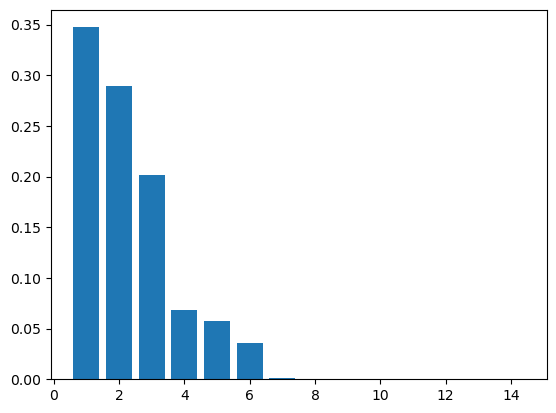

In [78]:
# var ratio bar plot
ax=plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)


In [79]:
# pc1 is derived from first eigen vector
e1=pd.DataFrame(pca.components_[0,:]) #first eigen vector
e1.index=data_sc.columns
e1.sort_values(0,ascending=False).head(5)

,0
N4,0.446419
N10,0.446194
N12,0.131758
N5,-0.000000
N7,-0.037987


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [82]:
xtrain,xtest,ytrain,ytest=train_test_split(data_sc,out,test_size=0.2,random_state=48)
rf=RandomForestClassifier(random_state=48)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
ypred

array(['RAISE', 'RAISE', 'RAISE', 'RAISE', 'STOP', 'HOLD', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'HOLD', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'STOP', 'RAISE',
       'RAISE', 'STOP', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'HOLD', 'RAISE', 'RAISE', 'HOLD',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'HOLD', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'HOLD', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE', 'RAISE',
       'RAISE', 'RAISE', 'RAI

In [83]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        HOLD       1.00      0.80      0.89        10
       RAISE       1.00      1.00      1.00       166
        STOP       0.67      1.00      0.80         4

    accuracy                           0.99       180
   macro avg       0.89      0.93      0.90       180
weighted avg       0.99      0.99      0.99       180



In [84]:


xtrain,xtest,ytrain,ytest=train_test_split(pca_data[:,:5],out,test_size=0.2,random_state=48)
rf=RandomForestClassifier(random_state=48)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print('The number of PCA components ',xtrain.shape[1])
print(classification_report(ytest,ypred))


The number of PCA components  5
              precision    recall  f1-score   support

        HOLD       0.75      0.30      0.43        10
       RAISE       0.94      0.99      0.97       166
        STOP       0.00      0.00      0.00         4

    accuracy                           0.93       180
   macro avg       0.56      0.43      0.47       180
weighted avg       0.91      0.93      0.92       180



In [87]:
data_recom.shape

(2000, 3)

In [88]:
data_recom.head(5)

,userId,productId,Rating
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1
2,A2WNBOD3WNDNKT,439886341,3
3,A1GI0U4ZRJA8WN,439886341,1
4,A1QGNMC6O1VW39,511189877,5


In [90]:
!pip install surprise

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for surprise from https://files.pythonhosted.org/packages/61/de/e5cba8682201fcf9c3719a6fdda95693468ed061945493dea2dd37c5618b/surprise-0.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/154.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.4 kB ? eta -:--:--
     --------- --------------------------- 41.0/154.4 kB 326.8 kB/s eta 0:00:01
     -------------------------- --------- 112.6/154.4 kB 726.2 kB/s eta 0:00:01
     ------------------------------------ 154.4/154.4 kB 838.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): sta

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [117 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-311\surprise
  creating build\lib.win-amd64-cpython-311\surprise\model_selection
  copyi

In [98]:
!pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [117 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-311\surprise
  creating build\lib.win-amd64-cpython-311\surprise\model_selection
  copyi

SyntaxError: invalid syntax (3291151599.py, line 1)